# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code from [lecture 5](https://numeconcopenhagen.netlify.com/lectures/Workflow_and_debugging).
> 1. Remember this [guide](https://www.markdownguide.org/basic-syntax/) on markdown and (a bit of) latex.
> 1. Turn on automatic numbering by clicking on the small icon on top of the table of contents in the left sidebar.
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [ ]:
import numpy as np

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import inauguralproject

# Question 1

In question 1 we want to solve the consumers maximization problem. We solve the model by use the Scipy optimize function. 

In [2]:
# code for solving the model (remember documentation and comments)

# 1.1 optimal consumption, labor and utility as a function of wage rate

def star(w):

    # parameter values
    m = 1    # cash-on-hand
    t = 0.4  # standard labor income tax
    tt = 0.1 # top bracket labor income tax
    k = 0.4  # cut-off for the top labor income bracket
    v = 10   # disutility of labor
    e = 0.3  # Frisch elasticity of labor supply

    # total resources
    def x(l): 
        x = m+w*l-(t*w*l+tt*max(w*l-k,0))
        return x

    # objective / negative utility
    import numpy as np
    def obj(l):
        u=np.log(x(l))-v*(l**(1+1/e))/(1+1/e)
        return -u

    # optimization
    from scipy import optimize
    sol = optimize.minimize_scalar(obj,method='bounded',bounds=(0,1))
    l_star = sol.x
    c_star = x(l_star)
    u_star = -obj(l_star)

    return print(f'optimizing for wage rate={w}\n\nconsumption: {c_star:.3f}\nlabor:       {l_star:.3f}\nutility:     {u_star:.3f}\n')

# 1.2 answer / call function

star(0.666)


optimizing for wage rate=0.666

consumption: 1.146
labor:       0.365
utility:     0.107



# Question 2

We want to find the optimal choices of consumption and leisure when N = 10.000. We loop the optimization problem 10.000 times over different values for values of w between 0.5 and 1.5, as it is given in the exercise that the wage is between 0.5 and 1.5, and from that we find the optimal l and c for each w.

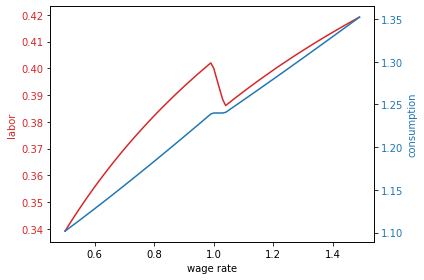

In [3]:
# 2.1 optimal labor as a function of wage rate

def labor_star(w):

    # parameter values
    m = 1    # cash-on-hand
    t = 0.4  # standard labor income tax
    tt = 0.1 # top bracket labor income tax
    k = 0.4  # cut-off for the top labor income bracket
    v = 10   # disutility of labor
    e = 0.3  # Frisch elasticity of labor supply

    # total resources
    def x(l): 
        x = m+w*l-(t*w*l+tt*max(w*l-k,0))
        return x

    # objective / negative utility
    import numpy as np
    def obj(l):
        u=np.log(x(l))-v*(l**(1+1/e))/(1+1/e)
        return -u

    # optimization
    from scipy import optimize
    sol = optimize.minimize_scalar(obj,method='bounded',bounds=(0,1))
    l_star = sol.x
    return l_star



# 2.2 optimal consumption as a function of wage rate

def consumption_star(w):

    # parameter values
    m = 1    # cash-on-hand
    t = 0.4  # standard labor income tax
    tt = 0.1 # top bracket labor income tax
    k = 0.4  # cut-off for the top labor income bracket
    v = 10   # disutility of labor
    e = 0.3  # Frisch elasticity of labor supply

    # total resources
    def x(l): 
        x = m+w*l-(t*w*l+tt*max(w*l-k,0))
        return x

    # objective / negative utility
    import numpy as np
    def obj(l):
        u=np.log(x(l))-v*(l**(1+1/e))/(1+1/e)
        return -u

    # optimization
    from scipy import optimize
    sol = optimize.minimize_scalar(obj,method='bounded',bounds=(0,1))
    l_star = sol.x
    c_star = x(l_star)
    return c_star



# 2.3 arrays

import numpy as np
wage_rate=np.arange(0.5,1.5,0.01)
labor=np.array([labor_star(i) for i in wage_rate])
consumption=np.array([consumption_star(i) for i in wage_rate])



# 2.4 answer / plot

import matplotlib.pyplot as plt

fig, ax1 = plt.subplots() # first y axis and x axis
color = 'tab:red'
ax1.set_xlabel('wage rate')
ax1.set_ylabel('labor', color=color)
ax1.plot(wage_rate, labor, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx() # second y axis
color = 'tab:blue'
ax2.set_ylabel('consumption', color=color)
ax2.plot(wage_rate, consumption, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout() 
plt.show()


# Question 3

Meaning that the total tax revenue is given by 1632.189.

In [4]:
# 3.1 tax revenue per person as a function of wage rate

def tax_rev_per_per(w):

    # parameter values 
    t = 0.4  # standard labor income tax
    tt = 0.1 # top bracket labor income tax
    k = 0.4  # cut-off for the top labor income bracket

    #tax revenue per person
    trpp=t*w*labor_star(w)+tt*max(w*labor_star(w)-k,0)

    return trpp



# 3.2 wage distribution

import numpy as np
population=10000 # population
low_bound=0.5 # minimum value
high_bound=1.5 # maximum value
np.random.seed(666) # seed
wage=np.random.uniform(low=low_bound,high=high_bound,size=population)



# 3.3 sum of tax revenue per person from population

tax_revenue=0
for i in wage:
    tax_revenue=tax_revenue + tax_rev_per_per(i)



# 3.4 answer

print(f'total tax revenue is {tax_revenue:.3f}')
#=1632.189 (slow)



total tax revenue is 1632.189


# Question 4

If ε instead were 0.1 the total tax revenue increases from 1632.189 to 3198.68, m
eaning that there would be an increase of 1566.499. 
This is due to the fact that the decrease in Frisch elasticity lowers the substitution effect.

In [5]:
# 4.1 new optimal labor as a function of wage rate

def labor_star2(w):
    
    # parameter values
    m = 1    # cash-on-hand
    t = 0.4  # standard labor income tax
    tt = 0.1 # top bracket labor income tax
    k = 0.4  # cut-off for the top labor income bracket
    v = 10   # disutility of labor
    e = 0.1  # Frisch elasticity of labor supply

    # total resources
    def x(l): 
        x = m+w*l-(t*w*l+tt*max(w*l-k,0))
        return x

    # objective / negative utility
    import numpy as np
    def obj(l):
        u=np.log(x(l))-v*(l**(1+1/e))/(1+1/e)
        return -u

    # optimization
    from scipy import optimize
    sol = optimize.minimize_scalar(obj,method='bounded',bounds=(0,1))
    l_star = sol.x
    return l_star



# 4.2 new tax revenue per person as a function of wage rate

def tax_rev_per_per2(w):
    
    # parameter values 
    t = 0.4  # standard labor income tax
    tt = 0.1 # top bracket labor income tax
    k = 0.4  # cut-off for the top labor income bracket

    #tax revenue per person
    trpp=t*w*labor_star2(w)+tt*max(w*labor_star2(w)-k,0)

    return trpp



# 4.3 new total tax revenue

tax_revenue2=0

for i in wage:
    tax_revenue2=tax_revenue2 + tax_rev_per_per2(i)



# 4.4 answer 

print(f'total tax revenue increases\n\nfrom:    {tax_revenue:.3f}\nto:      {tax_revenue2:.3f}\nchange:  {tax_revenue2-tax_revenue:.3f}\n\nnote: the decrease in Frisch elasticity\nlowers the substitution effect')
#=3198.688 (slow)

total tax revenue increases

from:    1632.189
to:      3198.688
change:  1566.499

note: the decrease in Frisch elasticity
lowers the substitution effect


# Question 5

To find the value of tau_0, tau_1 and kappa we will use optimize.minimize.
We found the tau_0=0.443 , tau_1=0.343, kappa=0 and total tax revenue=2468.53

In [3]:
# wage distribution

import numpy as np
population=10000 # population
low_bound=0.5 # minimum value
high_bound=1.5 # maximum value
np.random.seed(666) # seed
wage=np.random.uniform(low=low_bound,high=high_bound,size=population)

tax_revenue=1632.189


# 5.1 objective

def new_objective(x):

    # new optimal labor
    def new_labor_star(w):

        m = 1    # cash-on-hand
        v = 10   # disutility of labor
        e = 0.3  # Frisch elasticity of labor supply

        # total resources
        def new_x(l): 
            res = m+w*l-(x[0]*w*l+x[1]*max(w*l-x[2],0))
            return res

        # objective / negative utility
        import numpy as np
        def new_obj(l):
            u=np.log(new_x(l))-v*(l**(1+1/e))/(1+1/e)
            return -u

        # optimization
        from scipy import optimize
        new_labor_sol = optimize.minimize_scalar(new_obj,method='bounded',bounds=(0,1))
        new_l_star = new_labor_sol.x
        return new_l_star

    # new tax revenue per person
    def new_tax_rev_per_per(w):
        ntrpp=x[0]*w*new_labor_star(w)+x[1]*max(w*new_labor_star(w)-x[2],0)
        return ntrpp

    # new total tax revenue
    new_tax_reveneu=0
    for i in wage:
        new_tax_reveneu=new_tax_reveneu + new_tax_rev_per_per(i)

    return -new_tax_reveneu



# 5.2 initial guess

x0=[0,0,0]


# 5.3 bounds

b=(0.0,1.0) # variable
bounds=(b,b,b) #vector



# 5.4 constraint

def con(x): # defining constraint
   return -(x[0]+x[1])+1 # intention: t+tt<1 (sum of taxes should be smaller than one)

constraint = ({'type':'ineq','fun':con}) # in a dictionary



# 5.5 optimization

from scipy.optimize import minimize
new_sol=minimize(new_objective, x0, method='SLSQP', bounds=bounds, constraints=constraint)



# 5.6 answer

print(f'setting according to wishes\n\nnew standard labor income tax:                {new_sol.x[0]:.3f}\nnew top bracket labor income tax:             {new_sol.x[1]:.3f}\nnew cut-off for the top labor income bracket: {new_sol.x[2]:.3f}\nnew total tax revenue:                        {-new_objective([new_sol.x[0],new_sol.x[1],new_sol.x[2]]):.3f}\ncurrent total tax revenue:                    {tax_revenue:.3f}\nchange in tax revenue:                        {-new_objective([new_sol.x[0],new_sol.x[1],new_sol.x[2]])-tax_revenue:.3f}\n\nnote: implementation might be a unpopular move')
# suggestion: t=0.443 , tt=0.343, k=0, total tax revenue=2468.534 (very slow)


setting according to wishes

new standard labor income tax:                0.443
new top bracket labor income tax:             0.342
new cut-off for the top labor income bracket: 0.000
new total tax revenue:                        2468.534
current total tax revenue:                    1632.189
change in tax revenue:                        836.345

note: implementation might be a unpopular move


# Conclusion

In this project we have solved the consumerss maximization problem, the results showed the optimal level of consumption and leisure are increasing in wage and there is a kink around the cut-off in the plot when wage equals 1. 
Futhermore we find that the tax revenue for the elasticity equals 0.3 is 1632.19 and when the elasticity equals 0.1 the tax revenue is 3198.69. 
When elasticity of the labour supply decreases we found the tax revenue increases. 